In [1]:
# Step 1: Import libraries and load the dataset
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('../data/bangalore_rent_data_advanced.csv')

# Display basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (3500, 6)


,Title,Location,Rent,Area,Furnishing,Bathrooms
0,Office Space for Rent in Mahatma Gandhi Road B...,NaN,₹2.8 Lac,Super Area1890 sqft,Const. Age Less than 5 years,2.0
1,"3 BHK Flat for Rent in L&T Raintree Boulevard,...",NaN,"₹69,000",Carpet Area986 sqft,3,3.0
2,Office Space for Rent in Electronic City Banga...,NaN,₹6 Lac,Carpet Area9000 sqft,Bachelors/Family,4.0
3,"4 BHK Flat for Rent in Brigade Gateway, Rajaji...",NaN,₹1 Lac,Carpet Area2000 sqft,4,4.0
4,"Office Space for Rent in Itpl, Whitefield Bang...",NaN,₹11.6 Lac,Carpet Area13800 sqft,Bachelors/Family,8.0


In [2]:
import re

def extract_location(title):
    # Look for the last occurrence of " in " and extract what follows
    match = re.search(r'\bin\b\s+(.+)', title)
    if match:
        loc = match.group(1).strip()
        # Remove trailing words like "Bangalore" or "Bengaluru"
        loc = re.sub(r'\b(Bangalore|Bengaluru)\b', '', loc, flags=re.IGNORECASE).strip().strip(",")
        return loc
    return np.nan

# Apply the function
df['Location'] = df['Title'].apply(extract_location)

# Check results
print("Missing values in Location:", df['Location'].isna().sum())
df[['Title', 'Location']].head(10)


Missing values in Location: 0


,Title,Location
0,Office Space for Rent in Mahatma Gandhi Road B...,Mahatma Gandhi Road
1,"3 BHK Flat for Rent in L&T Raintree Boulevard,...","L&T Raintree Boulevard, Hebbal"
2,Office Space for Rent in Electronic City Banga...,Electronic City
3,"4 BHK Flat for Rent in Brigade Gateway, Rajaji...","Brigade Gateway, Rajajinagar"
4,"Office Space for Rent in Itpl, Whitefield Bang...","Itpl, Whitefield"
5,"2 BHK Flat for Rent in Sparkle Marquise, Banne...","Sparkle Marquise, Bannerghatta Main Road"
6,Office Space for Rent in Indiranagar Bangalore,Indiranagar
7,"2 BHK Flat for Rent in Godrej Woodsman Estate,...","Godrej Woodsman Estate, Hebbal"
8,"Office Space for Rent in Itpl, Whitefield Bang...","Itpl, Whitefield"
9,4 BHK Flat for Rent in Prestige Estates Shanti...,"Prestige Estates Shantiniketan, Whitefield"


In [3]:
print("Sample Data:")
display(df.head())

# Column-wise info (data types + non-null counts)
print("\nColumn Info:")
df.info()

# Count of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

Sample Data:


,Title,Location,Rent,Area,Furnishing,Bathrooms
0,Office Space for Rent in Mahatma Gandhi Road B...,Mahatma Gandhi Road,₹2.8 Lac,Super Area1890 sqft,Const. Age Less than 5 years,2.0
1,"3 BHK Flat for Rent in L&T Raintree Boulevard,...","L&T Raintree Boulevard, Hebbal","₹69,000",Carpet Area986 sqft,3,3.0
2,Office Space for Rent in Electronic City Banga...,Electronic City,₹6 Lac,Carpet Area9000 sqft,Bachelors/Family,4.0
3,"4 BHK Flat for Rent in Brigade Gateway, Rajaji...","Brigade Gateway, Rajajinagar",₹1 Lac,Carpet Area2000 sqft,4,4.0
4,"Office Space for Rent in Itpl, Whitefield Bang...","Itpl, Whitefield",₹11.6 Lac,Carpet Area13800 sqft,Bachelors/Family,8.0



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       3500 non-null   object 
 1   Location    3500 non-null   object 
 2   Rent        3500 non-null   object 
 3   Area        3446 non-null   object 
 4   Furnishing  3500 non-null   object 
 5   Bathrooms   3017 non-null   float64
dtypes: float64(1), object(5)
memory usage: 164.2+ KB

Missing Values:
Title           0
Location        0
Rent            0
Area           54
Furnishing      0
Bathrooms     483
dtype: int64


In [4]:
df.drop(columns=['Furnishing'], inplace=True)


In [5]:
import re

def extract_bhk(title):
    match = re.search(r'(\d+)\s*BHK', title)
    if match:
        return int(match.group(1))
    else:
        return None

df['BHK'] = df['Title'].apply(extract_bhk)


In [6]:
df = df.dropna(subset=['Bathrooms'])


In [7]:
df = df.dropna(subset=['Area'])


In [8]:
def extract_sqft(area_str):
    match = re.search(r'(\d+)', area_str.replace(',', ''))
    if match:
        return int(match.group(1))
    return None

df['Area_sqft'] = df['Area'].apply(extract_sqft)


In [9]:
# Check how many rows and columns remain
print("🔢 Shape of DataFrame:")
print(df.shape)

# Check for any remaining missing values
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

# Show data types of each column
print("\n📋 Data Types:")
print(df.dtypes)

# Preview cleaned dataset
print("\n🔍 Sample Rows:")
display(df.head())


🔢 Shape of DataFrame:
(3013, 7)

🕳️ Missing Values:
Title          0
Location       0
Rent           0
Area           0
Bathrooms      0
BHK          670
Area_sqft      0
dtype: int64

📋 Data Types:
Title         object
Location      object
Rent          object
Area          object
Bathrooms    float64
BHK          float64
Area_sqft      int64
dtype: object

🔍 Sample Rows:


,Title,Location,Rent,Area,Bathrooms,BHK,Area_sqft
0,Office Space for Rent in Mahatma Gandhi Road B...,Mahatma Gandhi Road,₹2.8 Lac,Super Area1890 sqft,2.0,NaN,1890
1,"3 BHK Flat for Rent in L&T Raintree Boulevard,...","L&T Raintree Boulevard, Hebbal","₹69,000",Carpet Area986 sqft,3.0,3.0,986
2,Office Space for Rent in Electronic City Banga...,Electronic City,₹6 Lac,Carpet Area9000 sqft,4.0,NaN,9000
3,"4 BHK Flat for Rent in Brigade Gateway, Rajaji...","Brigade Gateway, Rajajinagar",₹1 Lac,Carpet Area2000 sqft,4.0,4.0,2000
4,"Office Space for Rent in Itpl, Whitefield Bang...","Itpl, Whitefield",₹11.6 Lac,Carpet Area13800 sqft,8.0,NaN,13800


In [10]:
# Drop the original unclean 'Area' column
df.drop(columns=['Area'], inplace=True)

# Rename 'Area_sqft' to 'Area'
df.rename(columns={'Area_sqft': 'Area'}, inplace=True)


In [11]:
# Preview rows where BHK is missing
df[df['BHK'].isnull()].sample(10)


,Title,Location,Rent,Bathrooms,BHK,Area
480,"Studio Apartment for Rent in Kannuru, Bangalore",Kannuru,"₹6,000",1.0,NaN,500
3336,Office Space for Rent in Indiranagar Bangalore,Indiranagar,₹2 Lac,5.0,NaN,2500
1874,Office Space for Rent in Chikkabettahalli Bang...,Chikkabettahalli,₹1 Lac,3.0,NaN,1000
488,Studio Apartment for Rent in Byagadadhenahalli...,Byagadadhenahalli,"₹14,500",1.0,NaN,999
887,Office Space for Rent in Yeshwanthpur Industri...,Yeshwanthpur Industrial Suburb,₹1.8 Lac,3.0,NaN,3350
2846,Office Space for Rent in Infantry Road Bangalore,Infantry Road,"₹45,000",5.0,NaN,500
747,Office Space for Rent in Phase 1st JP Nagar Ba...,Phase 1st JP Nagar,₹2 Lac,3.0,NaN,3500
951,Office Space for Rent in Jc Nagar Bangalore,Jc Nagar,₹1.5 Lac,3.0,NaN,350
2334,Showroom for Rent in Whitefield Bangalore,Whitefield,₹3.9 Lac,4.0,NaN,5500
2928,Office Space for Rent in Phase 8th JP Nagar Ba...,Phase 8th JP Nagar,"₹88,000",2.0,NaN,2600


In [12]:
df = df.dropna(subset=['BHK'])


In [13]:
print("✅ Final Shape:")
print(df.shape)

print("\n🧼 Final Missing Values:")
print(df.isnull().sum())

print("\n📋 Columns:")
print(df.columns)

print("\n🔍 Sample Rows:")
display(df.head())


✅ Final Shape:
(2343, 6)

🧼 Final Missing Values:
Title        0
Location     0
Rent         0
Bathrooms    0
BHK          0
Area         0
dtype: int64

📋 Columns:
Index(['Title', 'Location', 'Rent', 'Bathrooms', 'BHK', 'Area'], dtype='object')

🔍 Sample Rows:


,Title,Location,Rent,Bathrooms,BHK,Area
1,"3 BHK Flat for Rent in L&T Raintree Boulevard,...","L&T Raintree Boulevard, Hebbal","₹69,000",3.0,3.0,986
3,"4 BHK Flat for Rent in Brigade Gateway, Rajaji...","Brigade Gateway, Rajajinagar",₹1 Lac,4.0,4.0,2000
5,"2 BHK Flat for Rent in Sparkle Marquise, Banne...","Sparkle Marquise, Bannerghatta Main Road","₹55,000",2.0,2.0,834
7,"2 BHK Flat for Rent in Godrej Woodsman Estate,...","Godrej Woodsman Estate, Hebbal","₹59,000",2.0,2.0,1302
9,4 BHK Flat for Rent in Prestige Estates Shanti...,"Prestige Estates Shantiniketan, Whitefield",₹1.3 Lac,5.0,4.0,3122


In [14]:
df.to_csv('../data/bangalore_rent_data_final.csv', index=False)
print("✅ Final cleaned dataset saved as 'bangalore_rent_data_final.csv'")


✅ Final cleaned dataset saved as 'bangalore_rent_data_final.csv'


In [15]:
def clean_rent(rent_str):
    rent_str = rent_str.replace('₹', '').replace(',', '').strip().lower()

    if 'lac' in rent_str:
        try:
            value = float(rent_str.replace('lac', '').strip()) * 100000
        except:
            return None
    else:
        try:
            value = float(rent_str)
        except:
            return None
    
    return int(value)

df['Rent'] = df['Rent'].apply(clean_rent)


In [16]:
print("✅ Data types after cleaning Rent:")
print(df.dtypes)

print("\n🔢 Some Rent values:")
print(df['Rent'].sample(10))

# Check if any rent is still NaN
print("\n🕳️ Missing Rent values:", df['Rent'].isnull().sum())


✅ Data types after cleaning Rent:
Title         object
Location      object
Rent           int64
Bathrooms    float64
BHK          float64
Area           int64
dtype: object

🔢 Some Rent values:
75      45000
366     35000
829     34000
3173    65000
1594    29000
80      55000
2225    28000
2703    32000
1807    65000
2723    50000
Name: Rent, dtype: int64

🕳️ Missing Rent values: 0


In [17]:
df.to_csv('../data/bangalore_rent_data_final.csv', index=False)
print("✅ Updated 'Rent' column saved to bangalore_rent_data_final.csv")


✅ Updated 'Rent' column saved to bangalore_rent_data_final.csv


**EDA BEGINS HERE**

In [18]:
# Basic descriptive stats
df.describe()


,Rent,Bathrooms,BHK,Area
count,2.343000e+03,2343.000000,2343.000000,2343.000000
mean,7.669787e+04,3.718737,2.558685,1483.751174
std,2.522121e+05,3.902727,1.016029,1024.452374
min,3.000000e+03,1.000000,1.000000,10.000000
25%,2.250000e+04,2.000000,2.000000,900.000000
50%,4.200000e+04,3.000000,3.000000,1200.000000
75%,7.000000e+04,4.000000,3.000000,1732.000000
max,7.500000e+06,38.000000,10.000000,12000.000000


In [19]:
# Extremely high Rent
df[df['Rent'] > 300000].sort_values(by='Rent', ascending=False)

# Extremely high Bathrooms
df[df['Bathrooms'] > 10].sort_values(by='Bathrooms', ascending=False)

# Extremely low Area
df[df['Area'] < 100].sort_values(by='Area')

# Extremely high Area
df[df['Area'] > 4000].sort_values(by='Area', ascending=False)


,Title,Location,Rent,Bathrooms,BHK,Area
2213,10 BHK House for Rent in Banashankari Bangalore,Banashankari,250000,3.0,10.0,12000
499,4 BHK Villa for Rent in Nandi Hills Bangalore,Nandi Hills,350000,6.0,4.0,9905
1074,> 10 BHK House for Rent in Cubbon Road Bangalore,Cubbon Road,550000,4.0,10.0,8000
673,6 BHK Villa for Rent in J P Nagar Bangalore,J P Nagar,400000,5.0,6.0,8000
2053,4 BHK House for Rent in Hsr Layout Bangalore,Hsr Layout,300000,3.0,4.0,7800
...,...,...,...,...,...,...
212,"4 BHK Flat for Rent in Indiranagar, Bangalore",Indiranagar,250000,4.0,4.0,4100
192,4 BHK Villa for Rent in Devanahalli Bangalore,Devanahalli,160000,4.0,4.0,4100
176,"4 BHK Villa for Rent in Epip Zone, Whitefield ...","Epip Zone, Whitefield",300000,5.0,4.0,4089
117,4 BHK Flat for Rent in Prestige White Meadows ...,"Prestige White Meadows Villas, Byrappa Layout ...",250000,6.0,4.0,4041


In [20]:
# Copy of cleaned dataframe to filter
df_filtered = df.copy()

# Apply upper limits
df_filtered = df_filtered[
    (df_filtered['Rent'] <= 200000) &
    (df_filtered['Area'] <= 5000) &
    (df_filtered['BHK'] <= 6) &
    (df_filtered['Bathrooms'] <= 6)
]

# Check how many rows are left
print(f"Filtered dataset shape: {df_filtered.shape}")


Filtered dataset shape: (2068, 6)


In [21]:
df_filtered.describe()


,Rent,Bathrooms,BHK,Area
count,2068.000000,2068.000000,2068.000000,2068.000000
mean,50791.533366,2.701161,2.471954,1358.187621
std,41021.401819,1.140646,0.910449,769.699067
min,3000.000000,1.000000,1.000000,10.000000
25%,21000.000000,2.000000,2.000000,900.000000
50%,39250.000000,3.000000,2.000000,1200.000000
75%,65000.000000,3.000000,3.000000,1680.000000
max,200000.000000,6.000000,6.000000,5000.000000


In [22]:
df_filtered[df_filtered["Area"] < 100]


,Title,Location,Rent,Bathrooms,BHK,Area
1285,1 BHK House for Rent in Doddamangala Bangalore,Doddamangala,10000,2.0,1.0,60
1816,1 BHK House for Rent in Nelamangala Town Banga...,Nelamangala Town,5000,1.0,1.0,20
2431,2 BHK House for Rent in Pavamana Nagar Kothnur...,Pavamana Nagar Kothnur,18000,1.0,2.0,10


In [23]:
df_filtered = df_filtered[df_filtered["Area"] >= 100]


In [26]:
df_filtered.describe()

,Rent,Bathrooms,BHK,Area
count,2065.000000,2065.000000,2065.000000,2065.000000
mean,50849.341889,2.703148,2.473608,1360.117191
std,41022.613986,1.140139,0.909897,768.589147
min,3000.000000,1.000000,1.000000,100.000000
25%,21000.000000,2.000000,2.000000,900.000000
50%,39999.000000,3.000000,2.000000,1200.000000
75%,65000.000000,3.000000,3.000000,1680.000000
max,200000.000000,6.000000,6.000000,5000.000000


In [28]:
df_filtered.to_csv("../data/bangalore_rent_data_model_ready.csv", index=False)


In [29]:
# full cleaned data (in case you want it later)
df_full_cleaned = df.copy()

# modeling-ready data (used for EDA and modeling)
df = df_filtered.copy()


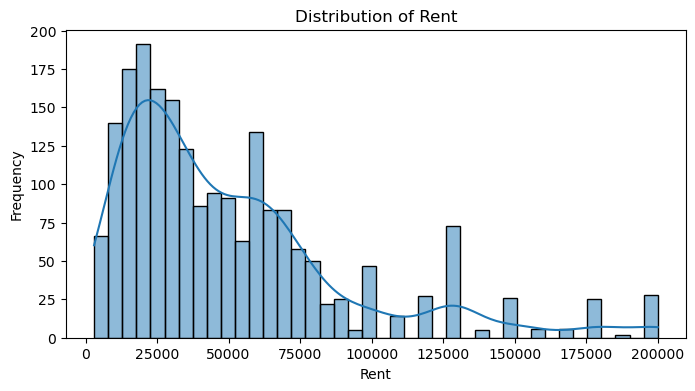

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rent Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Rent'], bins=40, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


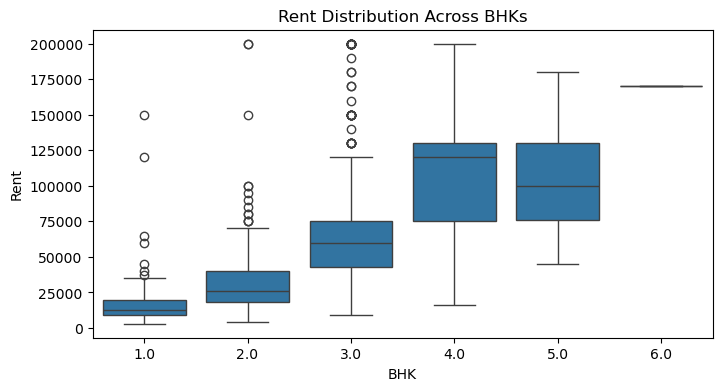

In [31]:
# Rent vs BHK
plt.figure(figsize=(8, 4))
sns.boxplot(x='BHK', y='Rent', data=df)
plt.title('Rent Distribution Across BHKs')
plt.xlabel('BHK')
plt.ylabel('Rent')
plt.show()


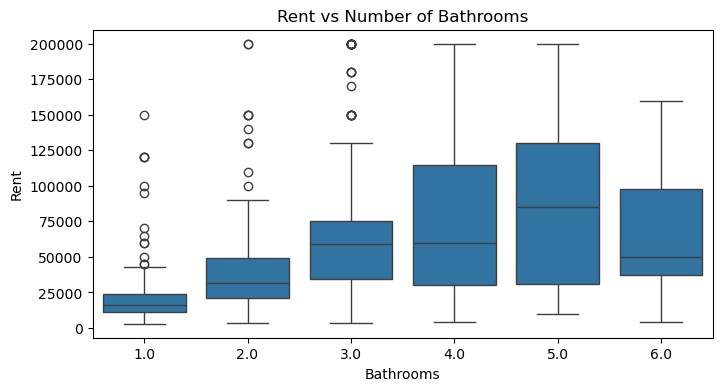

In [32]:
# Rent vs Bathrooms
plt.figure(figsize=(8, 4))
sns.boxplot(x='Bathrooms', y='Rent', data=df)
plt.title('Rent vs Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Rent')
plt.show()


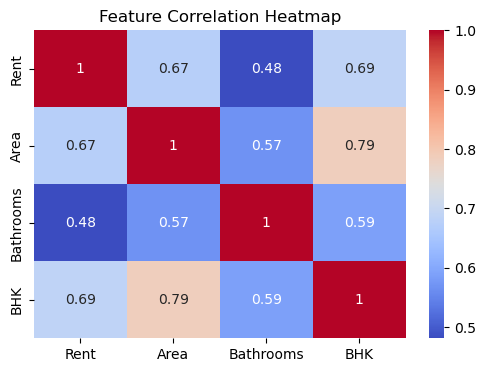

In [33]:
# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Rent', 'Area', 'Bathrooms', 'BHK']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


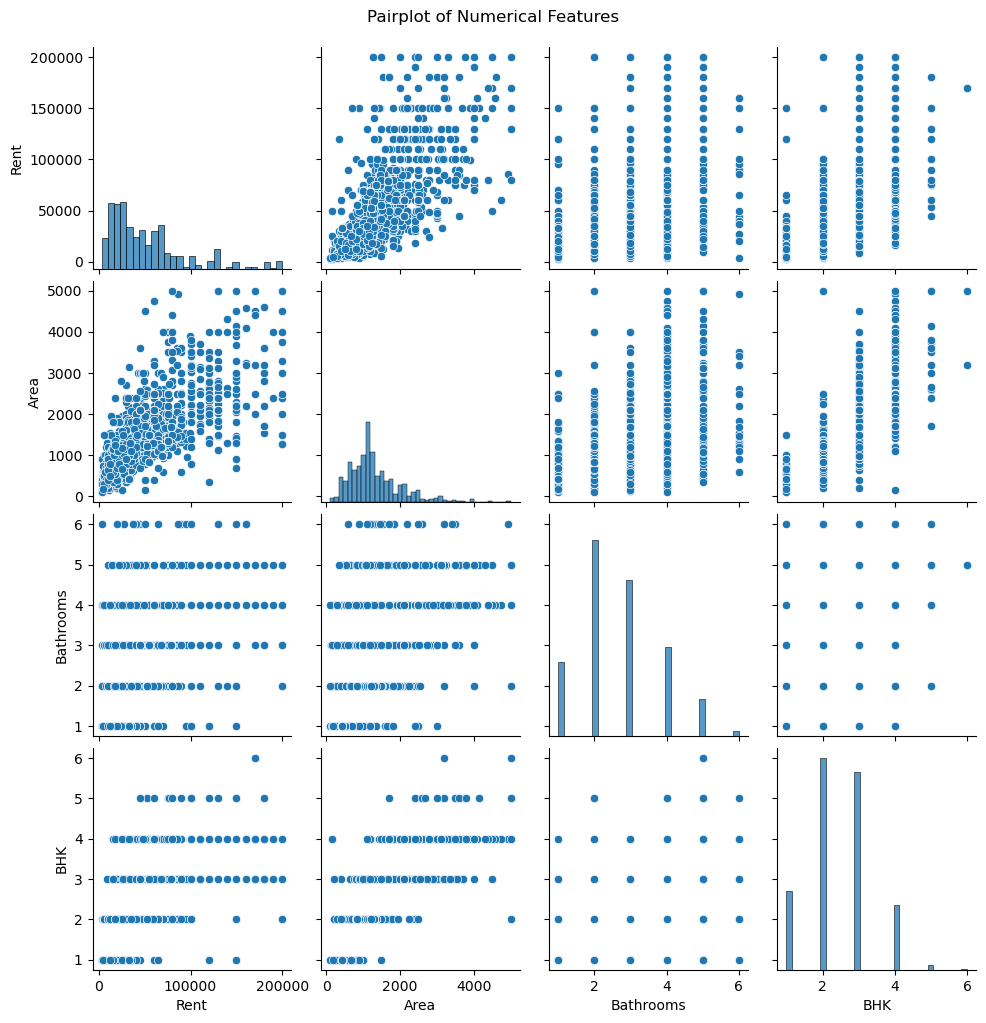

In [34]:
# Pairplot to see relationships
sns.pairplot(df[['Rent', 'Area', 'Bathrooms', 'BHK']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


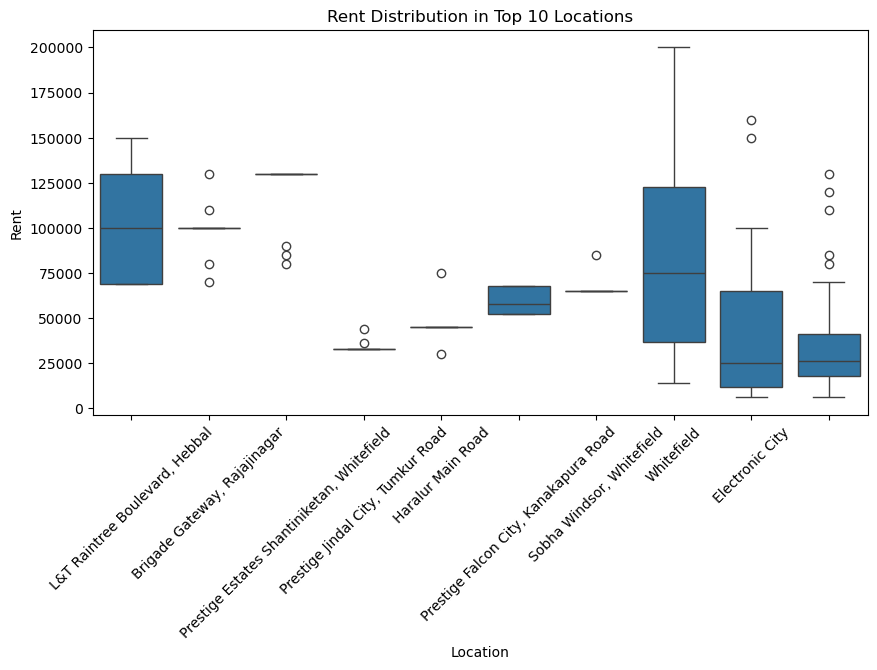

In [35]:
# Top 10 locations by count
top_locations = df['Location'].value_counts().head(10).index

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['Location'].isin(top_locations)], x='Location', y='Rent')
plt.title('Rent Distribution in Top 10 Locations')
plt.xticks(rotation=45)
plt.show()
